#### **01-Feature_Engineer (Feature Transformation, Scaling, and Selection)**
#### Project name: **Telecom Customer Churn Prediction**
#### Author: **Fausto Pucheta Fortin**

#### **Introduction:** 
This notebook is the continuation of 01-EDA_2. \
With the findings in the previous notebook, we now have the foundation to perform usefull feature engineer techniques that will help the model to generalize properly. The tasks of this notebook will provide the basis for the next phase, which is *Modeling & Evaluation*.

#### **Tasks:**
1. Binning:
    1. 'Age' binning with tree categories: 'Young Adults', 'Middle-age Adults', and 'Seniors'.
2. New Binary Features:
    1. 'high_support_calls': it will take **1** for customers that made more than 4 support calls, and **0** otherwise.
    2. 'high_payment_delay': it will take **1** for customers with a payment delay higher than 20 weeks, and **0** otherwise.
    3. 'high_spender': it will take **1** for customers who spent a total > $450 and **0** otherwise.
    4. 'Gender': current feature will be transformed into binary (**0** for males and **1** for females).
    5. 'monthly_contract': it will take **1** for customers with a monthly contract and **0** otherwise.
    6. 'low_interaction_cust': it will take **1** for customers with a last interaction of 14 months and **0** otherwise.

3. Interaction Features:
    1. 'age_support_calls_interaction' will be created **multiplying** 'age' and 'support calls'.
    2. 'payment_delay_to_total_spent_ratio' will be created **dividing** 'payment delay' with 'total spent'.
    
4. Feature Scaling:
    1. **Normalize** with *min-max* scaling 'age_support_calls_interaction' using MinMaxScaler.
    2. **Standardize** with *z-score scaling* 'payment_delay_to_total_spent_ratio' using StandardScaler().
    
5. Data Visualization:
    1. Correlation heatmap

6. Remove Unnecessary Features

7. Save Final Data Frame

#### **Findings:**
1. New feature 'age_category' resulted in almost the same correlation than the original continuous feature 'Age' (**18%** vs **19%** respectively).
2. New binary features 'high_support_calls', 'high_payment_delay', 'monthly_contract', and 'low_spender' proved to be better than their predecessors. Having respectively a correlation of **54%**, **41%**, **37%**, **47%**, **36%**, and **41%**.
3. The new interaction features 'age_support_calls_interaction' and 'payment_delay_to_total_spent_ratio' turned out to be good possible indicators of churn, having a correlation of **47%** and **36%** respectively.
4. The *normalized* version and *standardized* version of 'age_support_calls_interaction' and 'payment_delay_to_total_spent_ratio', respectively, has the same impact in correlation between features and target variable.

#### **Further steps:** Modeling & Evaluation (01-Modeling_&_Evaluation.ipynb)
1. Data Splitting
2. Save Training and Test data
3. Modeling:
    1. Decision Tree Classifier
    2. Random Forest Regressor
    3. XGBoost
4. Evaluation:
    1. Accuracy Score
    2. Recall
    3. F1 Score
5. Feature Importance Analysis

In [1]:
import sys
sys.path.append('../src/functions')

# EDA functions
from plot_functions import *

# Analysis libraries
import numpy as np
import pandas as pd
import pickle

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Data
df = pd.read_pickle("../data/processed/imputed_df.pkl")

1. Binning

1. 1. 'Age' binning with tree categories: 'Young Adults', 'Middle-age Adults', and 'Seniors'.

In [2]:
# Define the bins and labels for age categories
bins = [0, 29, 49, float('inf')]
labels = ['Young Adults', 'Middle-age Adults', 'Seniors']

# Create a new column 'age_category' with the age categories
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows of the DataFrame to verify the new column
df[['Age', 'age_category']]

,Age,age_category
0,30.0,Middle-age Adults
1,65.0,Seniors
2,55.0,Seniors
3,58.0,Seniors
4,23.0,Young Adults
...,...,...
64369,45.0,Middle-age Adults
64370,37.0,Middle-age Adults
64371,25.0,Young Adults
64372,50.0,Seniors


2. New binary features

2. 1. 'high_support_calls': \
It will take **1** for customers that made more than 4 support calls, and **0** otherwise.

In [3]:
df['high_support_calls'] = np.where(df['Support Calls'] > 4, 1, 0)

In [4]:
df[['high_support_calls', 'Support Calls']].head(10)

,high_support_calls,Support Calls
0,1,5.0
1,1,10.0
2,1,6.0
3,1,7.0
4,1,5.0
5,1,9.0
6,0,3.0
7,0,4.0
8,1,7.0
9,0,2.0


2. 2. 'high_payment_delay': \
It will take **1** for customers with a payment delay higher than 20 weeks, and **0** otherwise.

In [5]:
df['high_payment_delay'] = np.where(df['Payment Delay'] > 20, 1, 0)
# df.drop('hihg_payment_delay', axis=1, inplace=True)

In [6]:
df[['high_payment_delay', 'Payment Delay']].head(10)

,high_payment_delay,Payment Delay
0,0,18.0
1,0,8.0
2,0,18.0
3,0,7.0
4,0,8.0
5,1,26.0
6,0,16.0
7,0,15.0
8,0,4.0
9,0,11.0


2. 3. 'high_spender': \
 it will take **1** for customers who spent a total > $450 and **0** otherwise.


In [7]:
df['low_spender'] = np.where(df['Total Spend'] > 450, 0, 1)

In [12]:
df[['Total Spend', 'low_spender']].head(10)

,Total Spend,low_spender
0,932.0,0
1,557.0,0
2,185.0,1
3,396.0,1
4,617.0,0
5,129.0,1
6,821.0,0
7,445.0,1
8,969.0,0
9,415.0,1


2. 4. 'Gender': \
Transforming current feature into binary (**0** for males and **1** for females).

In [9]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [10]:
df.head(10)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,age_category,high_support_calls,high_payment_delay,high_spender
0,30.0,1,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,Middle-age Adults,1,0,1
1,65.0,1,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,Seniors,1,0,1
2,55.0,1,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,Seniors,1,0,0
3,58.0,0,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,Seniors,1,0,0
4,23.0,0,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,Young Adults,1,0,1
5,51.0,0,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0,Seniors,1,1,0
6,58.0,1,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0,Seniors,0,0,1
7,55.0,1,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0,Seniors,0,0,0
8,39.0,0,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0,Middle-age Adults,1,0,1
9,64.0,1,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0,Seniors,0,0,0


2. 5. 'monthly_contract': \
It will take **1** for customers with a monthly contract and **0** otherwise.

In [11]:
df['monthly_contract'] = df['Contract Length'].apply(lambda x: 1 if x == 'Monthly' else 0)

In [12]:
df[['Contract Length', 'monthly_contract']].head(10)

,Contract Length,monthly_contract
0,Annual,0
1,Monthly,1
2,Quarterly,0
3,Monthly,1
4,Monthly,1
5,Annual,0
6,Quarterly,0
7,Annual,0
8,Quarterly,0
9,Quarterly,0


2. 6. 'low_interaction_cust': \
It will take **1** for customers with a last interaction of 14 months and **0** otherwise.

In [23]:
df = pd.read_pickle("../data/processed/features_df.pkl")
df['low_interaction_cust'] = df['Last Interaction'].apply(lambda x: 1 if x > 14 else 0 )

In [24]:
df[['Last Interaction', 'low_interaction_cust']].head(10)

,Last Interaction,low_interaction_cust
0,17.0,1
1,6.0,0
2,3.0,0
3,29.0,1
4,20.0,1
5,8.0,0
6,24.0,1
7,30.0,1
8,13.0,0
9,29.0,1


3. Interaction Features


3. 1. Creation of 'age_support_calls_interaction' by **multiplying** 'age' and 'support calls'.

In [13]:
df['age_support_calls_interaction'] = df['Age'] * df['Support Calls']

In [14]:
df[['Age', 'Support Calls', 'age_support_calls_interaction']].head(10)

,Age,Support Calls,age_support_calls_interaction
0,30.0,5.0,150.0
1,65.0,10.0,650.0
2,55.0,6.0,330.0
3,58.0,7.0,406.0
4,23.0,5.0,115.0
5,51.0,9.0,459.0
6,58.0,3.0,174.0
7,55.0,4.0,220.0
8,39.0,7.0,273.0
9,64.0,2.0,128.0



3. 2. Creation of 'payment_delay_to_total_spent_ratio' **dividing** 'payment delay' with 'total spent'.

In [15]:
df['payment_delay_to_total_spent_ratio'] = df['Payment Delay'] / df['Total Spend']

In [16]:
df[['Payment Delay', 'Total Spend', 'payment_delay_to_total_spent_ratio']].head(10)

,Payment Delay,Total Spend,payment_delay_to_total_spent_ratio
0,18.0,932.0,0.019313
1,8.0,557.0,0.014363
2,18.0,185.0,0.097297
3,7.0,396.0,0.017677
4,8.0,617.0,0.012966
5,26.0,129.0,0.201550
6,16.0,821.0,0.019488
7,15.0,445.0,0.033708
8,4.0,969.0,0.004128
9,11.0,415.0,0.026506


4. Feature Scaling

1. **Normalize** with *min-max* scaling 'age_support_calls_interaction' using MinMaxScaler.

In [18]:
# Create a Min-Max scaler instance
min_max_scaler = MinMaxScaler()

# Normalize the 'age_support_calls_interaction' feature
df['age_support_call_interaction_normalized'] = min_max_scaler.fit_transform(df[['age_support_calls_interaction']])

In [19]:
df.head(10)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,age_category,high_support_calls,high_payment_delay,monthly_contract,age_support_calls_interaction,payment_delay_to_total_spent_ratio,low_spender,age_support_call_interaction_normalized
0,30.0,1,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0,1,1,0,0,150.0,0.019313,0,0.230769
1,65.0,1,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0,2,1,0,1,650.0,0.014363,0,1.000000
2,55.0,1,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0,2,1,0,0,330.0,0.097297,1,0.507692
3,58.0,0,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0,2,1,0,1,406.0,0.017677,1,0.624615
4,23.0,0,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0,0,1,0,1,115.0,0.012966,0,0.176923
5,51.0,0,33.0,25.0,9.0,26.0,1,0,129.0,8.0,1.0,2,1,1,0,459.0,0.201550,1,0.706154
6,58.0,1,49.0,12.0,3.0,16.0,2,2,821.0,24.0,1.0,2,0,0,0,174.0,0.019488,0,0.267692
7,55.0,1,37.0,8.0,4.0,15.0,1,0,445.0,30.0,1.0,2,0,0,0,220.0,0.033708,1,0.338462
8,39.0,0,12.0,5.0,7.0,4.0,2,2,969.0,13.0,1.0,1,1,0,0,273.0,0.004128,0,0.420000
9,64.0,1,3.0,25.0,2.0,11.0,2,2,415.0,29.0,1.0,2,0,0,0,128.0,0.026506,1,0.196923


2. **Standardize** with *z-score scaling* 'payment_delay_to_total_spent_ratio' using StandardScaler().

In [20]:
# Create a StandardScaler instance
std_scaler = StandardScaler()

# Standardize the 'payment_delay_to_total_spent_ratio' feature
df['payment_delay_to_total_spent_ratio_standardized'] = std_scaler.fit_transform(df[['payment_delay_to_total_spent_ratio']])

In [21]:
df.head(10)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,age_category,high_support_calls,high_payment_delay,monthly_contract,age_support_calls_interaction,payment_delay_to_total_spent_ratio,low_spender,age_support_call_interaction_normalized,payment_delay_to_total_spent_ratio_standardized
0,30.0,1,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0,1,1,0,0,150.0,0.019313,0,0.230769,-0.317433
1,65.0,1,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0,2,1,0,1,650.0,0.014363,0,1.000000,-0.457862
2,55.0,1,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0,2,1,0,0,330.0,0.097297,1,0.507692,1.894631
3,58.0,0,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0,2,1,0,1,406.0,0.017677,1,0.624615,-0.363855
4,23.0,0,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0,0,1,0,1,115.0,0.012966,0,0.176923,-0.497480
5,51.0,0,33.0,25.0,9.0,26.0,1,0,129.0,8.0,1.0,2,1,1,0,459.0,0.201550,1,0.706154,4.851835
6,58.0,1,49.0,12.0,3.0,16.0,2,2,821.0,24.0,1.0,2,0,0,0,174.0,0.019488,0,0.267692,-0.312466
7,55.0,1,37.0,8.0,4.0,15.0,1,0,445.0,30.0,1.0,2,0,0,0,220.0,0.033708,1,0.338462,0.090877
8,39.0,0,12.0,5.0,7.0,4.0,2,2,969.0,13.0,1.0,1,1,0,0,273.0,0.004128,0,0.420000,-0.748175
9,64.0,1,3.0,25.0,2.0,11.0,2,2,415.0,29.0,1.0,2,0,0,0,128.0,0.026506,1,0.196923,-0.113407


In [28]:
df.describe()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,...,age_category,high_support_calls,high_payment_delay,monthly_contract,age_support_calls_interaction,payment_delay_to_total_spent_ratio,low_spender,age_support_call_interaction_normalized,payment_delay_to_total_spent_ratio_standardized,low_interaction_cust
count,505207.000000,505207.000000,505207.000000,505207.000000,505207.000000,505207.000000,505207.000000,505207.000000,505207.000000,505207.000000,...,505207.000000,505207.000000,505207.000000,505207.000000,505207.000000,505207.000000,505207.000000,505207.000000,5.052070e+05,505207.000000
mean,39.704173,0.445229,31.350437,15.714826,3.833316,13.496842,1.012181,0.997536,620.072823,14.610579,...,1.029232,0.362675,0.221115,0.216216,158.026825,0.030504,0.253255,0.243118,-2.610350e-16,0.478036
std,12.670564,0.496992,17.237464,8.619314,3.133600,8.451179,0.814347,0.885313,245.319016,8.608278,...,0.700183,0.480773,0.414998,0.411664,148.077611,0.035254,0.434876,0.227812,1.000001e+00,0.499518
min,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.652673e-01,0.000000
25%,29.000000,0.000000,16.000000,8.000000,1.000000,6.000000,0.000000,0.000000,446.000000,7.000000,...,1.000000,0.000000,0.000000,0.000000,42.000000,0.009863,0.000000,0.064615,-5.854836e-01,0.000000
50%,40.000000,0.000000,32.000000,16.000000,3.000000,13.000000,1.000000,1.000000,648.900000,14.000000,...,1.000000,0.000000,0.000000,0.000000,116.000000,0.020408,0.000000,0.178462,-2.863770e-01,0.000000
75%,49.000000,1.000000,46.000000,23.000000,6.000000,20.000000,2.000000,2.000000,824.000000,22.000000,...,2.000000,1.000000,0.000000,0.000000,240.000000,0.035427,1.000000,0.369231,1.396341e-01,1.000000
max,65.000000,1.000000,60.000000,30.000000,10.000000,30.000000,2.000000,2.000000,1000.000000,30.000000,...,2.000000,1.000000,1.000000,1.000000,650.000000,0.300000,1.000000,1.000000,7.644420e+00,1.000000


5. Data Visualization

5. 1. Correlation heatmap

<module 'matplotlib.pyplot' from 'c:\\Users\\Fausto\\Telecom-Customer-Churn-Project\\churnvenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

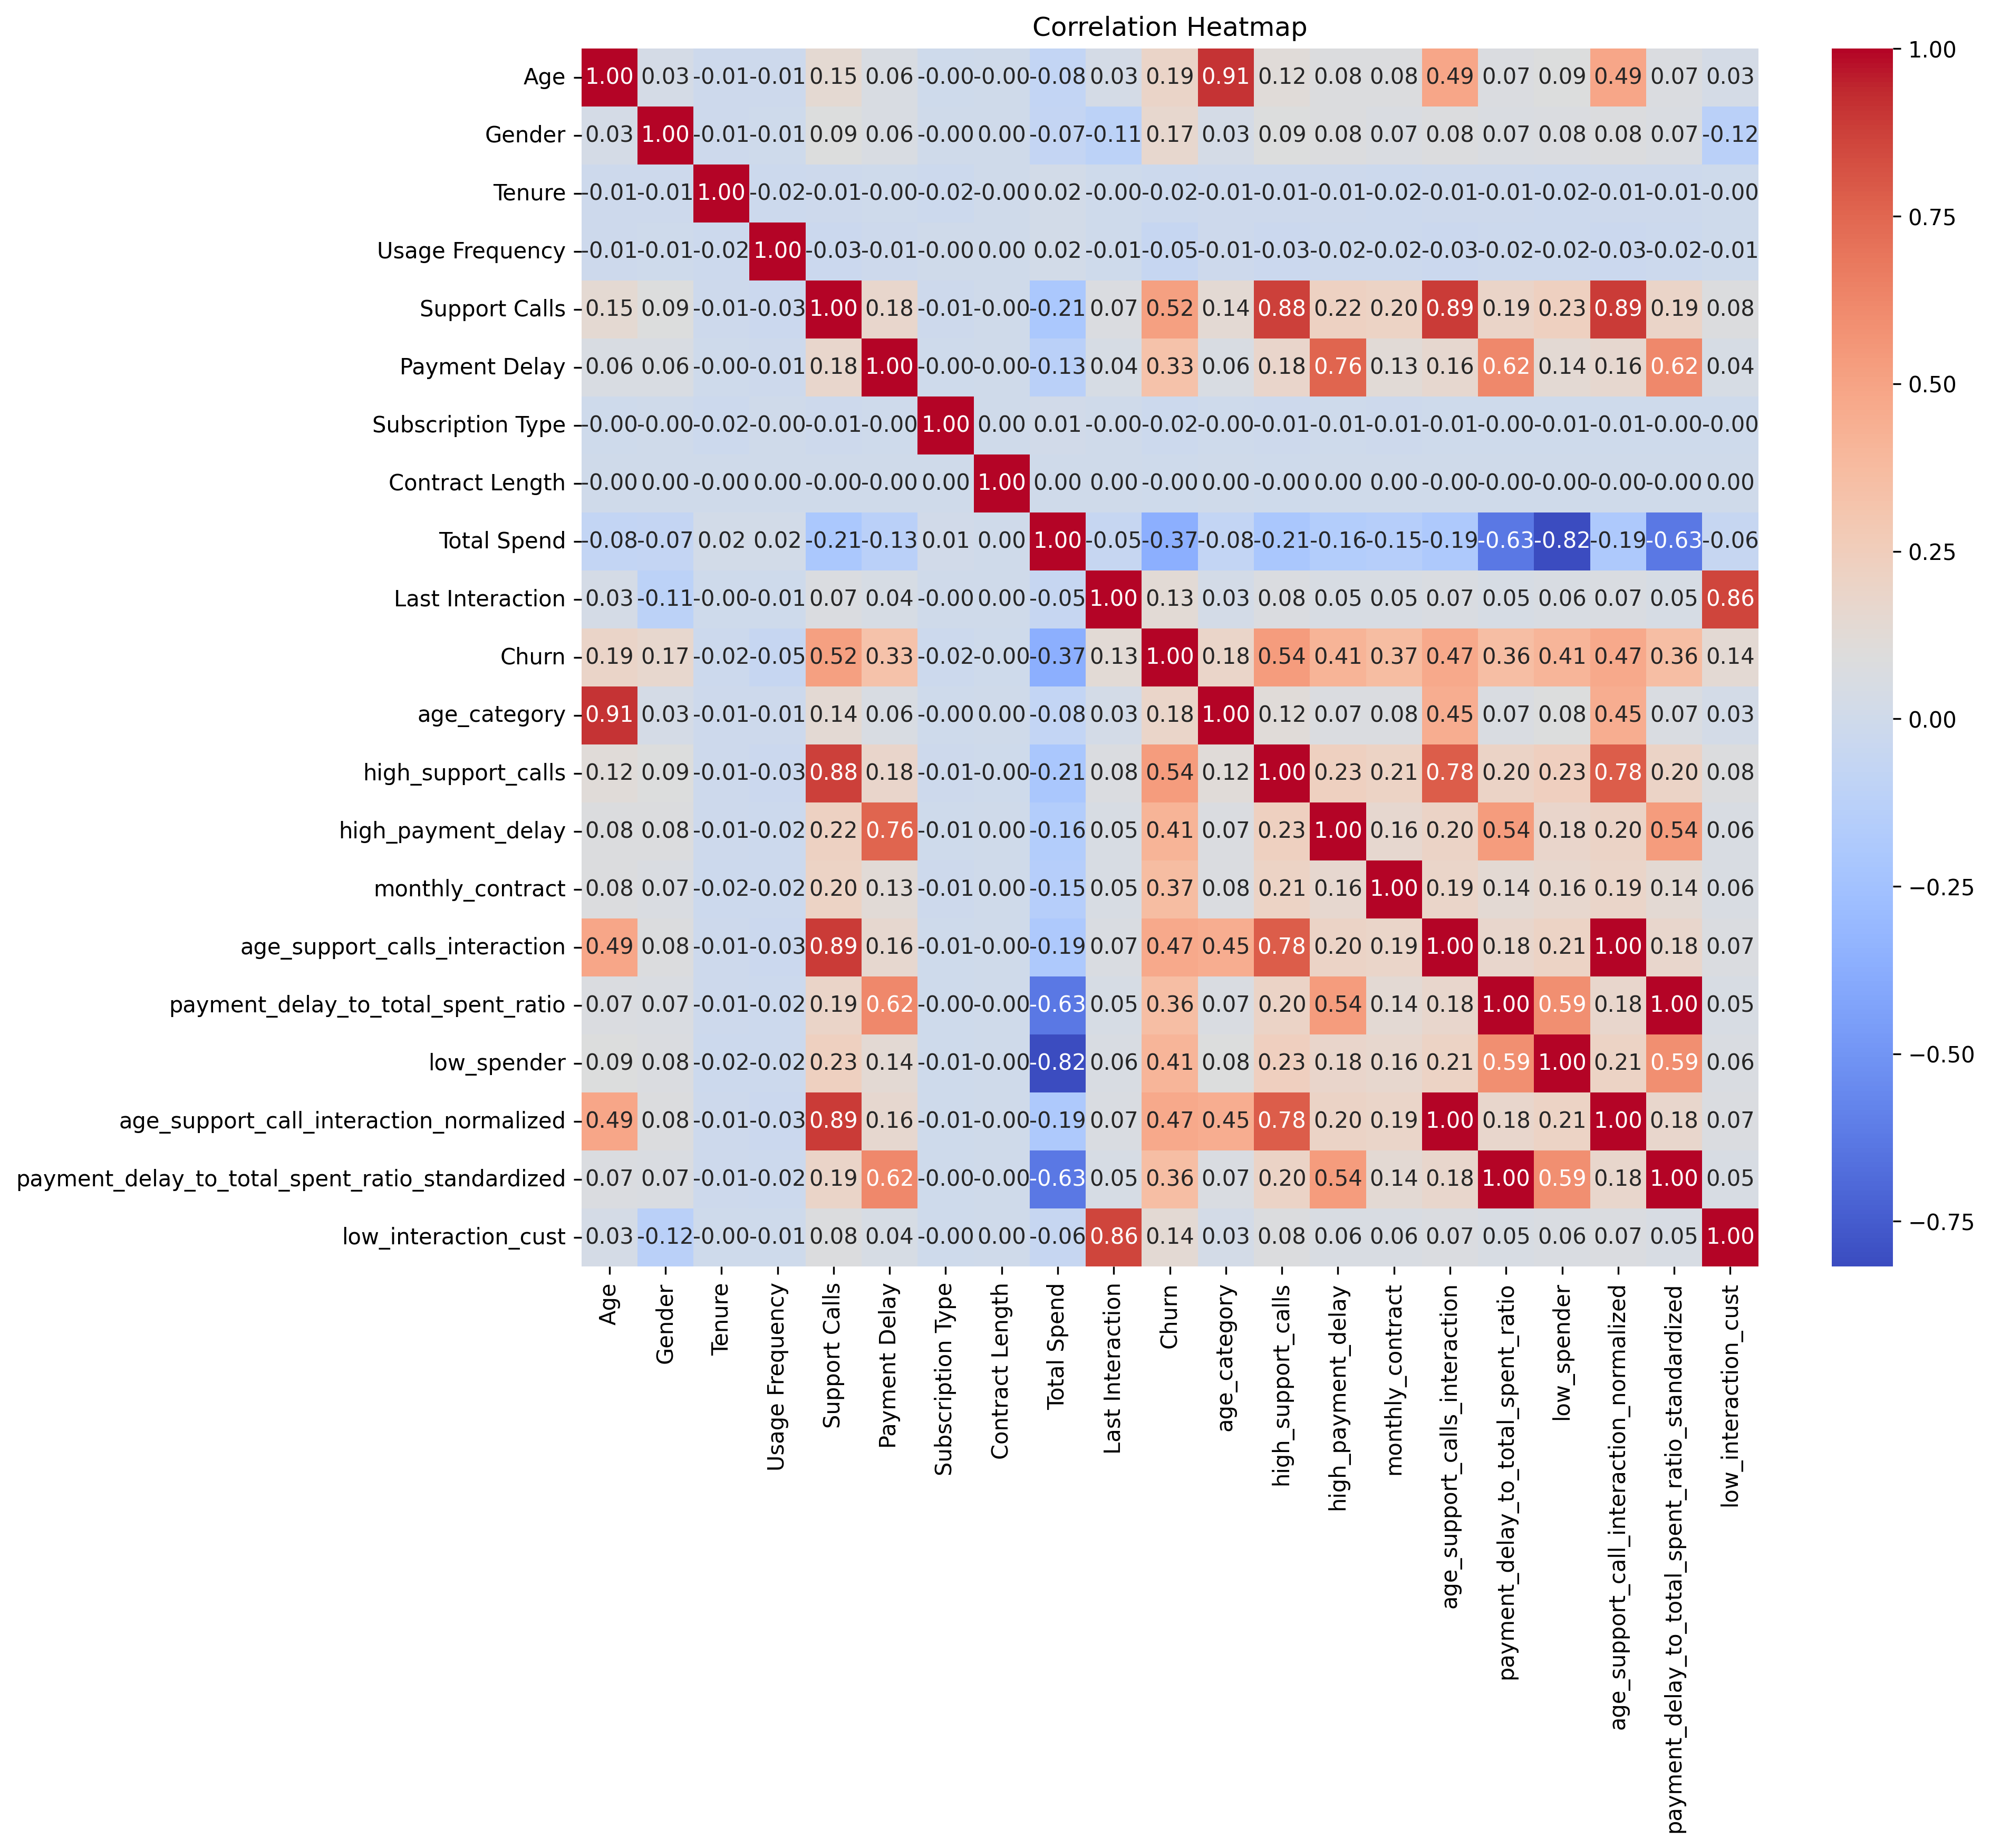

In [26]:
plot_correlation_heatmap(df)


6. Remove Unnecessary Features

In [ ]:
df.columns

In [ ]:
df.drop(columns=['Age','Tenure', 'Usage Frequency',
                 'Support Calls', 'Payment Delay',
                 'Subscription Type', 'Contract Length',
                 'Total Spend', 'Last Interaction', 'payment_delay_to_total_spent_ratio_standardized'], inplace=True)

7. Save Final Data Frame

In [27]:
with open("../data/processed/modeling_df.pkl", "wb") as file:
    pickle.dump(df, file)